# Homework Linear Regression
- The dataset you are working is Boston Housing Price
- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target.

### For this assignment, your task is to:
1. Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets)
2. Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff!
3. Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)
4. Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

**Hint: from sklearn.model_selection import train_test_split**

**Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)**
5. Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.
6. Compute, Mean-Square-Error (MSE) and R Squared score of your Model

**Hint: from sklearn.metrics import r2_score**

**Hint: from sklearn.metrics import mean_squared_error**

In [3]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np # linear algebra
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

boston = load_boston()

print(boston.data)
print("Shape=", boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

print("Head\n", bos.head())

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
Shape= (506, 13)
Head
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.1

## Apply data normalization (Scaling) to improve the prediction result
- Use StandardScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got
- Use MinMaxScaler and then train your Linear Regression Model. Comapre the R Square score with previous one you got
- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

In [4]:
#check for nan values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
boston_housing = load_boston()
boston_df = pd.DataFrame(boston_housing.data)
boston_df.columns = boston_housing.feature_names
boston_df['PRICE'] = boston_housing.target

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Features Definition
- **crim** - per capita crime rate by town
- **zn** - proportion of residential land zoned for lots over 25,000 sq.ft
- **indus** - proportion of non-retail business acres per town
- **chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **nox** - nitric oxides concentration (parts per 10 million)
- **rm** - average number of rooms per dwelling
- **age** - proportion of owner-occupied units built prior to 1940
- **dis** - weighted distances to five Boston employment centres
- **rad** - index of accessibility to radial highways
- **tax** - full-value property-tax rate per USD 10,000
- **ptratio** - pupil-teacher ratio by town
- **black** - proportion of blacks by town
- **lstat** - percentage of lower status of the population
- **medv** - median value of owner-occupied homes in USD 1000’s

## 2. Basic exploratory data analysis

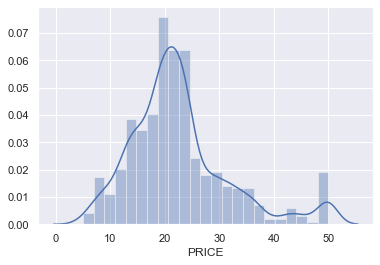

In [6]:
sns.distplot(boston_df['PRICE'])

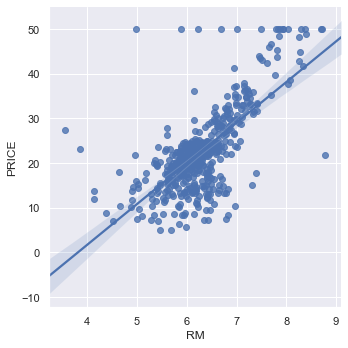

In [9]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="RM", y="PRICE", data=boston_df)

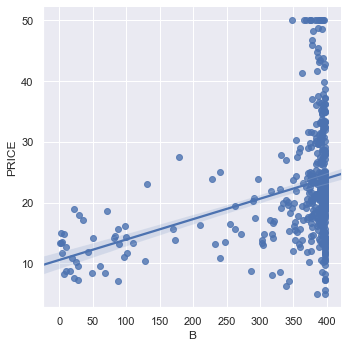

In [8]:
# Confirmed there is no racism going on
sns.lmplot(x="B", y="PRICE", data=boston_df)
plt.show()

## 3. Correlation heatmap to check how highly correlated our predictor variables (features) are
-  if you have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap [source](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)
    - Green means positive, red means negative. The stronger the color, the larger the correlation magnitude
    - High correlation is bad
- Think about the following questions when looking at a heatmap:
    - Where do your eyes jump first when you look at the chart?
    - What’s the strongest and what’s the weakest correlated pair (except the main diagonal)?
    - What are the three variables most correlated with price?


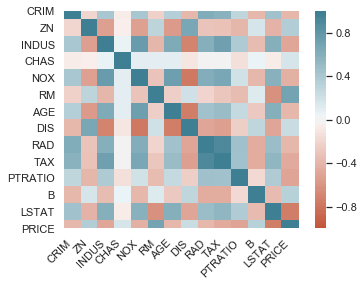

In [11]:
corr = boston_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

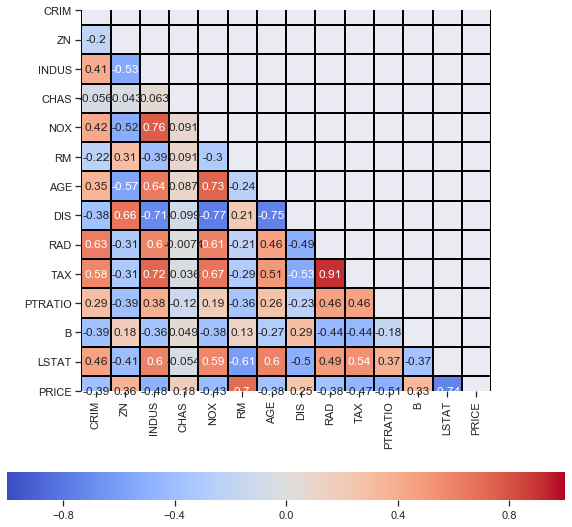

In [36]:
matrix = np.triu(bos.corr())
plt.figure(figsize = (10,10))
sns.heatmap(bos.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm', linewidths=1, linecolor='black', square=True, mask=matrix, cbar_kws= {'orientation': 'horizontal'} )


## 4. Train the model based on the train set.  
Use 75 percent of the data for train part.  Use 25 percent of the data for test part.

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_df, boston_housing.target, test_size=0.25)

## 5. Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

## 6. Compute, Mean-Square-Error (MSE) and R Squared score of your Model
Hint: from sklearn.metrics import r2_score

Hint: from sklearn.metrics import mean_squared_error